In [2]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
image_gen=ImageDataGenerator(rotation_range=30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [5]:
image_shape= (150,150,3)

In [6]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation="relu",))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D (filters=64, kernel_size=(3,3), input_shape=(150, 150,3), activation='relu',)) 
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150, 150,3), activation='relu',)) 
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation ('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
batch_size=16

train_image_gen=image_gen.flow_from_directory('D:\PYTHON PROJECT\Cat_Dog\Train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode= 'binary')

Found 1000 images belonging to 2 classes.


In [9]:
test_image_gen=image_gen.flow_from_directory('D:\PYTHON PROJECT\Cat_Dog\Test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode= 'binary')

Found 1000 images belonging to 2 classes.


In [10]:
results = model.fit(train_image_gen,epochs=5,
                           steps_per_epoch=10,
                           validation_data=test_image_gen,
                           validation_steps=5)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 0.6939 - accuracy: 0.5750 - val_loss: 0.6905 - val_accuracy: 0.5125
Epoch 2/5
10/10 [==============================] - 10s 1s/step - loss: 0.6944 - accuracy: 0.4875 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/5
10/10 [==============================] - 10s 1s/step - loss: 0.6801 - accuracy: 0.5500 - val_loss: 0.6547 - val_accuracy: 0.5500
Epoch 4/5
10/10 [==============================] - 10s 999ms/step - loss: 0.6918 - accuracy: 0.5000 - val_loss: 0.6796 - val_accuracy: 0.5625
Epoch 5/5
10/10 [==============================] - 10s 985ms/step - loss: 0.6962 - accuracy: 0.5500 - val_loss: 0.6697 - val_accuracy: 0.6250


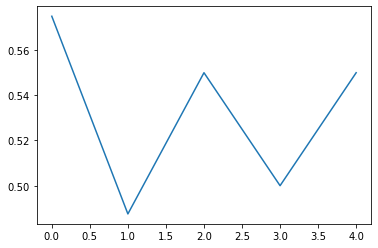

In [12]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])

In [21]:
train_image_gen.class_indices

{'Cat': 0, 'Dog': 1}

In [22]:
import cv2
from matplotlib import pyplot as plt

In [25]:
test_img=cv2.imread('D:/PYTHON PROJECT/Cat_Dog/Test/Dog/d31.png')

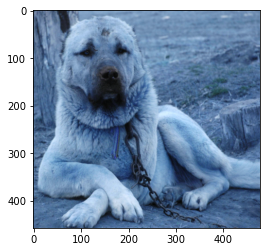

In [26]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [27]:
test_img.shape

(458, 477, 3)

In [28]:
test_img=cv2.resize(test_img,(150,150))

In [29]:
test_input=test_img.reshape((1,150,150,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 0s 58ms/step


array([[0.21047315]], dtype=float32)